In [1]:
import numpy as np
import matplotlib.pyplot as plt

def algo_get_cable_temperature(temperature_cable: float, temperature_ambiant: float, wind_speed: float, intensity: float) -> float:
    '''
    :param temperature_cable: from T0 in celsius
    :param temperature_ambiant: in celsius
    :param wind_speed: in meters per second
    :param intensity: in ampere
    :return: Temperature of the cable for T1 in celsius
    '''
    # result = 60 * (dTc/dt)
    first = (-(wind_speed**2/1600 * 0.4) - 0.1)
    second = (temperature_cable-temperature_ambiant-(intensity**1.4/73785) * 130)
    delta_t = first * second
    return delta_t

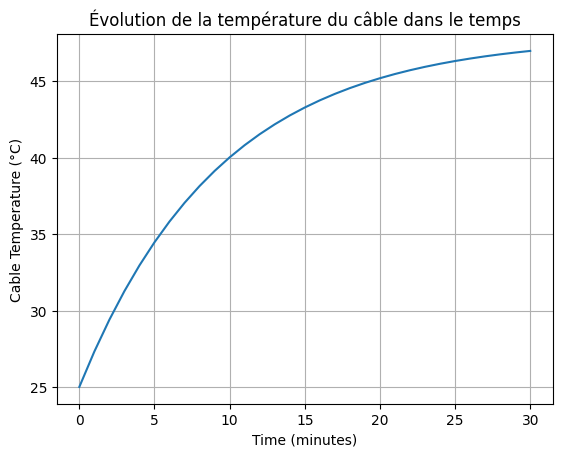

In [2]:
initial_temp = 25.0
ambient_temp = 20.0
wind_speed = 2.0
intensity = 1000
duration_minutes = 30

times = list(range(duration_minutes + 1))
temperatures = [initial_temp]

for t in times[1:]:
    current_temp = temperatures[-1]
    delta = algo_get_cable_temperature(current_temp, ambient_temp, wind_speed, intensity)
    temperatures.append(current_temp + delta)

plt.figure()
plt.plot(times, temperatures)
plt.xlabel("Time (minutes)")
plt.ylabel("Cable Temperature (°C)")
plt.title("Évolution de la température du câble dans le temps")
plt.grid(True)
plt.show()